# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There dataset used in this assignment is 'bank-additional-full.csv' with all examples (41188) with 42 unique campaigns and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

import warnings
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Number of unique campaigns in the dataframe

cnt = 0
campaigns = []
for i in range(0, len(df['campaign'])):
    if df['campaign'][i] not in campaigns:  
        campaigns.append(df['campaign'][i])
        cnt += 1

print("No.of.unique values :",cnt)
print("unique values :",campaigns)      

No.of.unique values : 42
unique values : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]


In [7]:
# Drop 'duration' column
#df = df.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



## Class Distribution

Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Missing Values

Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# Check Unique values of all the column
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------------------------
housing
['no' 'yes' 'unknown']
------------------------------------------------------------


In [11]:
# list all numerical columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [12]:
# list all categorical columns
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### Handle Missing Value /Unknown value

In [13]:
df.default.replace('unknown','no',inplace=True)

In [14]:
#df['default'] = df.default.replace('unknown', df.default.mode([0]))

In [15]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [16]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [17]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [18]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [19]:
df['y'].replace({'no':0,'yes':1},inplace=True)

<AxesSubplot:>

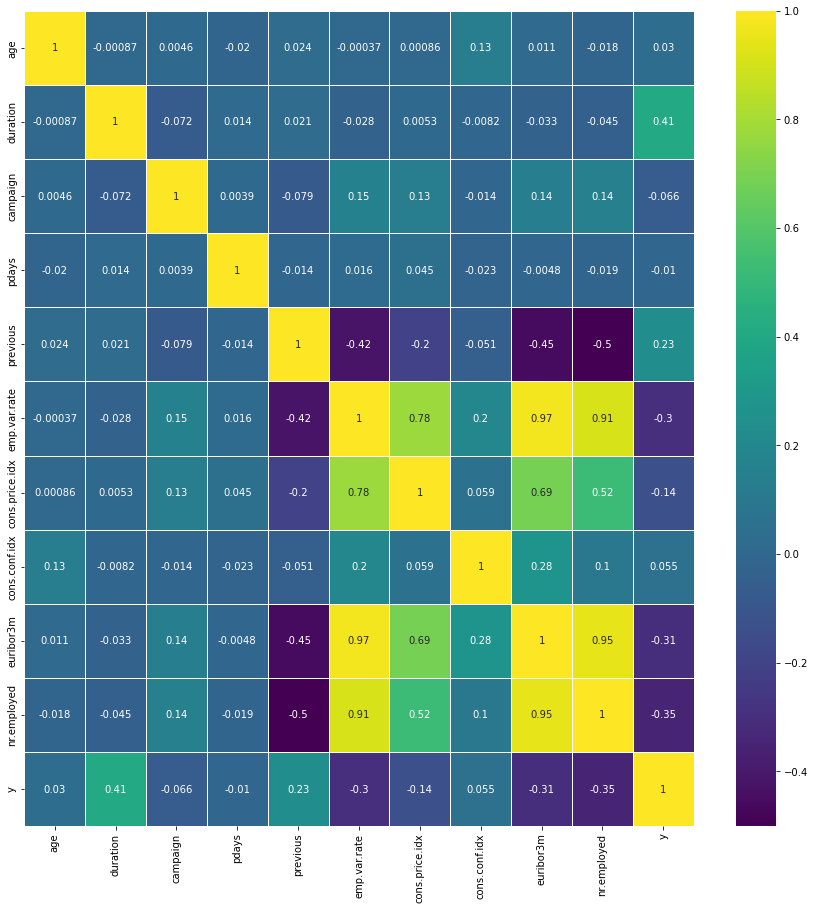

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [21]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [22]:
# drop rows where call duration was less than 10 seconds
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [23]:
#putting age into bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

In [24]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

From the result we can be assured that our data have no missing value and are good to go.

## Scale Numeric Data

Next up, we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data. The scaling will be done using the formula below:

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*

In [25]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
#df_ready = df.copy()

scaler = StandardScaler()
#num_cols = ['age', 'loan', 'day_of_week', 'campaign', 'pdays', 'previous']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.438735,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.566908,0.000231,-0.349587,nonexistent,0.645337,0.724016,0.882906,0.709647,0.328413,0
1,1.438735,services,married,high.school,no,no,no,telephone,may,mon,...,-0.566908,0.000231,-0.349587,nonexistent,0.645337,0.724016,0.882906,0.709647,0.328413,0
2,-0.531115,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.566908,0.000231,-0.349587,nonexistent,0.645337,0.724016,0.882906,0.709647,0.328413,0
3,0.453810,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.566908,0.000231,-0.349587,nonexistent,0.645337,0.724016,0.882906,0.709647,0.328413,0
4,1.438735,services,married,high.school,no,no,no,telephone,may,mon,...,-0.566908,0.000231,-0.349587,nonexistent,0.645337,0.724016,0.882906,0.709647,0.328413,0


In [26]:
# Apply LabelEncoder on categorical columns
from sklearn.preprocessing import LabelEncoder

labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.438735,3,1,0,0,0,0,1,6,1,...,-0.566908,0.000231,-0.349587,1,0.645337,0.724016,0.882906,0.709647,0.328413,0
1,1.438735,7,1,3,0,0,0,1,6,1,...,-0.566908,0.000231,-0.349587,1,0.645337,0.724016,0.882906,0.709647,0.328413,0
2,-0.531115,7,1,3,0,1,0,1,6,1,...,-0.566908,0.000231,-0.349587,1,0.645337,0.724016,0.882906,0.709647,0.328413,0
3,0.453810,0,1,1,0,0,0,1,6,1,...,-0.566908,0.000231,-0.349587,1,0.645337,0.724016,0.882906,0.709647,0.328413,0
4,1.438735,7,1,3,0,0,0,1,6,1,...,-0.566908,0.000231,-0.349587,1,0.645337,0.724016,0.882906,0.709647,0.328413,0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Task Objectives:

Direct marketing campaigns are an inexpensive means to increase sales; however, the performance of direct phone marketing is largely unknown.

In addition to performance, more information is need for improvement in efficiency of direct phone marketing. The goal is to examine the peformance of multiple classifier methods and find the one that returns the best metrics.

In this situation, there is a low cost or penalty for type-I errors i.e., false alarms. In this case we're targeting customers with phone calls who are likely to already purchase products. This is inefficient and maximizing precision will reduce costs and being a nuisance to buying customers. Type-II errors or missed detections is more detremental due to missing sales oppurtunities that would help. Here we wish to maximize recall score. Since there is a large class imbalance, accuracy score is not the best metric given that most of the feature space is of the class 0 or 'no sale'. We therefore optimize for maximum f1-score (combination of recall and precision) but utimately also want to pick methods that optimize recall.

Besides comparing the performance of the classifiers, we also wish to analize the imporatnce of the features and provide some interpretation so to improve the efficiency for future direct markinging methods.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40898 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40898 non-null  float64
 1   job             40898 non-null  int64  
 2   marital         40898 non-null  int64  
 3   education       40898 non-null  int64  
 4   default         40898 non-null  int64  
 5   housing         40898 non-null  int64  
 6   loan            40898 non-null  int64  
 7   contact         40898 non-null  int64  
 8   month           40898 non-null  int64  
 9   day_of_week     40898 non-null  int64  
 10  duration        40898 non-null  float64
 11  campaign        40898 non-null  float64
 12  pdays           40898 non-null  float64
 13  previous        40898 non-null  float64
 14  poutcome        40898 non-null  int64  
 15  emp.var.rate    40898 non-null  float64
 16  cons.price.idx  40898 non-null  float64
 17  cons.conf.idx   40898 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

This section focuses on the importance of the different features generated and in the dataframe. Depending on the importance score of some features, we can focus on higher importance scores to see if the AUC score (performance) of the model will improve.

In [29]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.002826,-0.383926,-0.109687,0.001075,-0.000986,0.001075,0.010998,-0.029675,-0.020023,...,0.009116,-0.014562,0.010060,0.018398,0.020536,0.008234,0.125248,0.032886,0.007195,0.016699
job,-0.002826,1.000000,0.027352,0.138429,0.013508,0.009071,0.013508,-0.029361,-0.034380,-0.002515,...,-0.007044,-0.000189,0.020657,0.009879,-0.009648,-0.019538,0.049880,-0.009017,-0.019129,0.025745
marital,-0.383926,0.027352,1.000000,0.111193,-0.002420,0.010169,-0.002420,-0.055327,-0.008370,0.002017,...,-0.008149,0.007331,0.039402,0.001084,-0.083370,-0.057756,-0.033111,-0.090735,-0.084651,0.046921
education,-0.109687,0.138429,0.111193,1.000000,0.002463,0.015282,0.002463,-0.109657,-0.083316,-0.018246,...,0.001013,-0.004613,0.039544,0.017439,-0.046377,-0.085531,0.077274,-0.038966,-0.043331,0.057793
default,0.001075,0.013508,-0.002420,0.002463,1.000000,-0.003687,1.000000,-0.006480,-0.004537,0.006076,...,-0.003809,0.000002,0.002774,-0.006222,0.004437,-0.003146,0.004479,0.005267,0.005946,-0.003064
housing,-0.000986,0.009071,0.010169,0.015282,-0.003687,1.000000,-0.003687,-0.077941,-0.017435,0.003661,...,-0.010740,-0.008290,0.022009,-0.012443,-0.058499,-0.076600,-0.031741,-0.057684,-0.045243,0.011342
loan,0.001075,0.013508,-0.002420,0.002463,1.000000,-0.003687,1.000000,-0.006480,-0.004537,0.006076,...,-0.003809,0.000002,0.002774,-0.006222,0.004437,-0.003146,0.004479,0.005267,0.005946,-0.003064
contact,0.010998,-0.029361,-0.055327,-0.109657,-0.006480,-0.077941,-0.006480,1.000000,0.277454,-0.008722,...,0.079258,0.001242,-0.213976,0.118736,0.395919,0.590365,0.251696,0.403885,0.275460,-0.144545
month,-0.029675,-0.034380,-0.008370,-0.083316,-0.004537,-0.017435,-0.004537,0.277454,1.000000,0.027431,...,-0.062191,-0.003204,0.103742,-0.065223,-0.178777,-0.004268,0.010371,-0.116415,-0.220999,-0.005670
day_of_week,-0.020023,-0.002515,0.002017,-0.018246,0.006076,0.003661,0.006076,-0.008722,0.027431,1.000000,...,-0.034960,-0.005451,-0.004569,0.018590,0.033296,0.006316,0.039742,0.039083,0.029155,0.014997


In [30]:
X = df.drop(['y','duration'],1)
y = df['y']

In [31]:
#All columns have correlation among all variable/features in dataset.  Apply PCA to avoid collinearity. 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)

print("n_components= " + str(pca.n_components_) )

n_components= 19


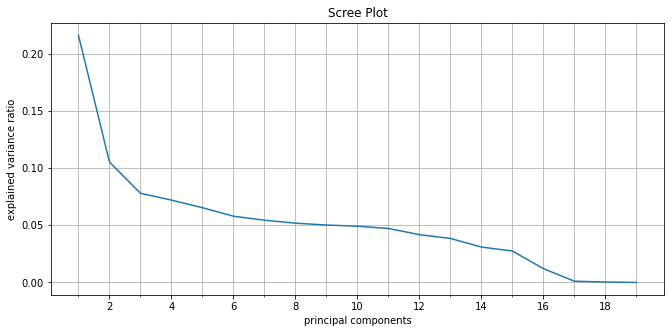

In [32]:
#Scree plot for best number of principal components 
x = np.arange(1,20,1)
fig, ax = plt.subplots(figsize=(11, 5))
ax.plot( x, pca.explained_variance_ratio_ )
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlabel("principal components")
ax.set_ylabel("explained variance ratio")
ax.set_title("Scree Plot")
ax.grid(visible=True, which='both')
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [34]:
evaluated_scores = pd.DataFrame()

### Procedures for evaluating scores and plotting graphs

In [35]:
#Computes all the scores
def evaluate_scores( clf, X_train, y_train, X_test, y_test, clf_text ):
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    y_test_pred = clf.predict( X_test )
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    auc = roc_auc_score( y_test, y_pred_proba )
    tn, fp, fn, tp = confusion_matrix( y_test, y_test_pred ).ravel()
    spec = tn/(tn+fp)
    acc  = accuracy_score( y_test, y_test_pred )
    prec = precision_score( y_test, y_test_pred )
    rec  = recall_score( y_test, y_test_pred )
    f1   = f1_score( y_test, y_test_pred )
    if clf_text == 'Baseline':
        fit_time = np.nan
    else:
        fit_time = np.mean( clf.cv_results_['mean_fit_time'])
        
    print(f'acc={acc:.3f} prec={prec:.3f} rec={rec:.3f} f1={f1:.3f} spec={spec:.3f} fit_time={fit_time:.3f}')

    #auc = roc_auc_score( y_test, y_pred_proba )
    
    score_dict = {'classifier' : [clf_text], 
                  'train_score':[round(train_score,3)], 
                  'accuracy':[round(acc,3)], 
                  'precision':[round(prec,3)], 
                  'recall':[round(rec,3)], 
                  'f1':[round(f1,3)], 
                  'specificity':[round(spec,3)],
                  'auc':[round(auc,3)],
                  'fit_time':[round(fit_time,3)] }
    df = pd.DataFrame(data=score_dict)
    return df

In [36]:
#Draw plots with confustion-matrix, ROC curve, Precision-Recall curve
def draw_plots( clf, X_test, y_test, clf_text ):
    """ draw plots with confustion-matrix, ROC curve, and Precision-Recall curve
        returns vectors fpr, tpr, precision, recall
        returns scalar auc
    :param clf: classifier 
    :param X_test: test split features X-independent variables
    :param y_test: test split target labels y-dependent variables
    :param clf_text: string name of classifier for labels 
    """  
    y_test_pred = clf.predict(X_test) 
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    #plot the Confusion-Matrix curve in upper-left
    fig, axs = plt.subplots(1,3, figsize=(16,5))
    fig.tight_layout(pad=5)
    clf_confusion_matrix = confusion_matrix( y_test, y_test_pred, normalize='true')
    sns.heatmap( clf_confusion_matrix, annot=True, ax=axs[0] )
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Truth')
    axs[0].set_title('Confusion Matrix')

    #plot the Precision-Recall Curve in the lower-right
    precision = precision_score( y_test, y_test_pred )
    recall    = recall_score( y_test, y_test_pred )
    f1        = f1_score( y_test, y_test_pred )
    clf_precision, clf_recall, prc_thresholds = precision_recall_curve( y_test, y_pred_proba )
    axs[1].plot( clf_recall, clf_precision, label=clf_text )
    axs[1].set_ylabel('Precision')
    axs[1].set_xlabel('Recall')
    axs[1].set_title('Precision-Recall Curve')
    axs[1].plot( recall, precision, 'o' )
    txtlabel = f'f1={f1:.3f}'
    axs[1].text( recall, precision, txtlabel)
    axs[1].legend()
    
    #plot the ROC curve in upper-right
    clf_fpr, clf_tpr, roc_thresholds = roc_curve( y_test,  y_pred_proba )
    clf_auc = roc_auc_score( y_test, y_pred_proba )
    legend_label_text = f'{clf_text} AUC={str(round(clf_auc,3))}'
    axs[2].plot( clf_fpr, clf_tpr, label=legend_label_text )
    axs[2].set_ylabel('True Positive Rate')
    axs[2].set_xlabel('False Positive Rate')
    axs[2].set_title('ROC')
    axs[2].legend()
    
    plt.show()    
    return clf_fpr, clf_tpr, clf_auc, clf_precision, clf_recall

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [37]:
#Baseline Model - DummyClassifier serves as a Baseline Model in scikit learn package.

#Fit Train/Test Set datasets
dummy_clf = DummyClassifier().fit(X_train, y_train)

#Evaluate Scores on Train/Test datasets
train_score = dummy_clf.score(X_train, y_train)
test_score = dummy_clf.score(X_test, y_test)
print(f'train_score={train_score:.3f} test_score={test_score:.3f}')

#Perform Predictions on test dataset
y_test_pred = dummy_clf.predict(X_test) 

# Evaluate performance on test datasets
accuracy  = accuracy_score( y_test, y_test_pred )
precision = precision_score( y_test, y_test_pred )
recall    = recall_score( y_test, y_test_pred )
f1 = f1_score( y_test, y_test_pred )

print(f'acc={accuracy:.3f} pre={precision:.3f} rec={recall:.3f} f1={f1:.3f}')

train_score=0.886 test_score=0.888
acc=0.888 pre=0.000 rec=0.000 f1=0.000


In [38]:
# Collect results in a dataframe
results_1 = evaluate_scores( dummy_clf, X_train, y_train, X_test, y_test, "Baseline" )
evaluated_scores = evaluated_scores.append(results_1, ignore_index = True)
evaluated_scores

acc=0.888 prec=0.000 rec=0.000 f1=0.000 spec=1.000 fit_time=nan


,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
0,Baseline,0.886,0.888,0.0,0.0,0.0,1.0,0.5,NaN


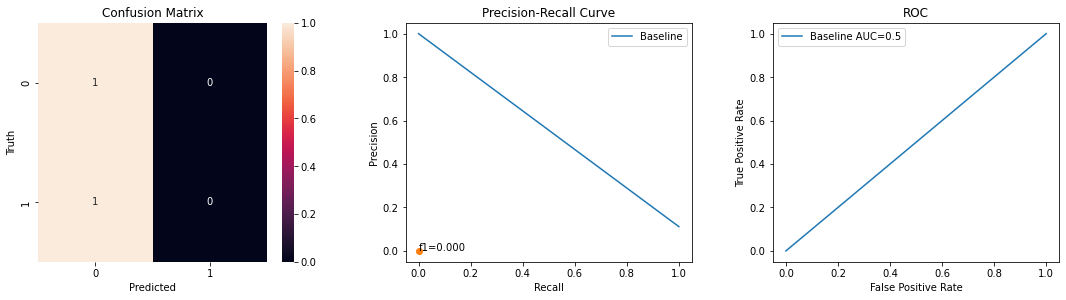

In [39]:
dummy_fpr, dummy_tpr, dummy_auc, dummy_precision, dummy_recall = draw_plots(dummy_clf, X_test, y_test, "Baseline")

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Using LogisticRegression Classifier

In [40]:
lgr_pipe = Pipeline([
    ( "pca", PCA()),
    ( "scaler", StandardScaler()),
    ( "lgr", LogisticRegression())
])

params = {
    "pca__n_components" : [ 7, 14, 17 ],
    "lgr__C" : [ 0.001, 0.002, 0.003, 0.005, 0.01, 0.03, 0.1, 1, 10, 100 ],
    "lgr__solver" : ["lbfgs"]
}

# scoring : accuracy, *roc_auc, *f1, recall, precision

lgr_grid = GridSearchCV( lgr_pipe, param_grid=params, cv=5, scoring='f1', verbose=0).fit(X_train,y_train)
print(lgr_grid.best_estimator_)
print(f'best param={lgr_grid.best_params_}  best score={lgr_grid.best_score_:.3f}')

Pipeline(steps=[('pca', PCA(n_components=17)), ('scaler', StandardScaler()),
                ('lgr', LogisticRegression(C=1))])
best param={'lgr__C': 1, 'lgr__solver': 'lbfgs', 'pca__n_components': 17}  best score=0.322


In [41]:
results_2 = evaluate_scores( lgr_grid, X_train, y_train, X_test, y_test, "LogisticRegression" )
evaluated_scores = evaluated_scores.append(results_2, ignore_index = True)
evaluated_scores

acc=0.901 prec=0.671 rec=0.232 f1=0.344 spec=0.986 fit_time=0.048


,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.50,NaN
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.79,0.048


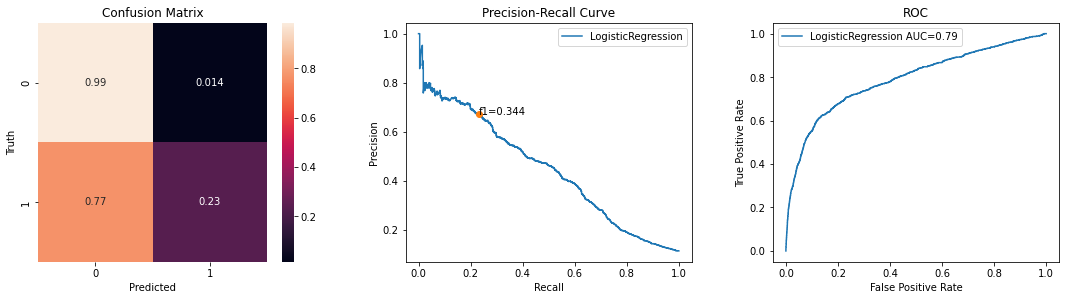

In [42]:
lgr_fpr, lgr_tpr, lgr_auc, lgr_precision, lgr_recall = draw_plots(lgr_grid, X_test, y_test, "LogisticRegression")

### Using KNeighborsClassifier

In [43]:
knn_pipe = Pipeline([
    ( "pca", PCA()),
    ( "scaler", StandardScaler()),
    ( "knn", KNeighborsClassifier())
])

params = {
    "pca__n_components" : [ 7, 14, 17 ],
    "knn__n_neighbors" : [ 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ] 
}

knn_grid = GridSearchCV( knn_pipe, param_grid=params, cv=5, scoring='f1', verbose=0).fit(X_train,y_train)
print(knn_grid.best_estimator_)
print(f'best param={knn_grid.best_params_}  best score={knn_grid.best_score_:.3f}')

Pipeline(steps=[('pca', PCA(n_components=17)), ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])
best param={'knn__n_neighbors': 9, 'pca__n_components': 17}  best score=0.380


In [44]:
results_3 = evaluate_scores( knn_grid, X_train, y_train, X_test, y_test, "KNeighborsClassifier" )
evaluated_scores = evaluated_scores.append(results_3, ignore_index = True)
evaluated_scores

acc=0.897 prec=0.575 rec=0.294 f1=0.389 spec=0.973 fit_time=0.039


,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039


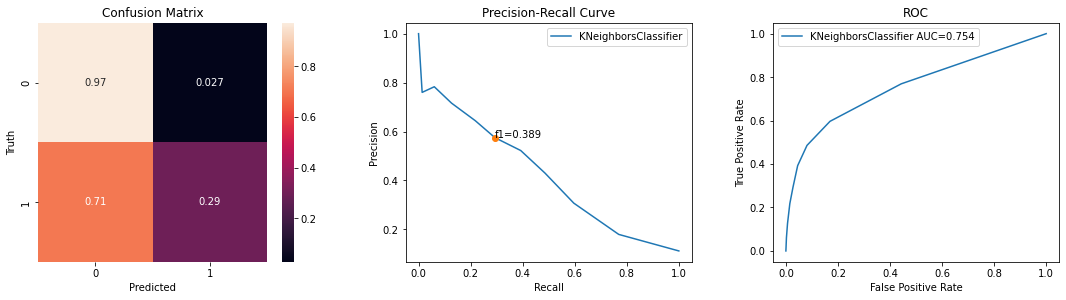

In [45]:
knn_fpr, knn_tpr, knn_auc, knn_precision, knn_recall = draw_plots(knn_grid, X_test, y_test, "KNeighborsClassifier")

### Using DecisionTree Classifier

In [46]:
tree_pipe = Pipeline([
    ("pca", PCA()),
    ('scale', StandardScaler()),
    ('tree', DecisionTreeClassifier(random_state=42))
])

params = { 
    "pca__n_components" : [ 7, 14, 17 ],
    'tree__criterion' : ['gini', 'entropy'], 
    'tree__max_depth' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ]
}

tree_grid = GridSearchCV(tree_pipe, param_grid=params, cv=5, scoring='f1', verbose=0).fit(X_train, y_train)

print(tree_grid.best_estimator_)
print(f'best param={tree_grid.best_params_}  best score={tree_grid.best_score_:.3f}')

Pipeline(steps=[('pca', PCA(n_components=17)), ('scale', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(max_depth=17, random_state=42))])
best param={'pca__n_components': 17, 'tree__criterion': 'gini', 'tree__max_depth': 17}  best score=0.358


In [47]:
results_4 = evaluate_scores( tree_grid, X_train, y_train, X_test, y_test, "DecisionTree" )
evaluated_scores = evaluated_scores.append(results_4, ignore_index = True)
evaluated_scores

acc=0.878 prec=0.431 rec=0.291 f1=0.347 spec=0.952 fit_time=0.321


,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039
3,DecisionTree,0.729,0.878,0.431,0.291,0.347,0.952,0.584,0.321


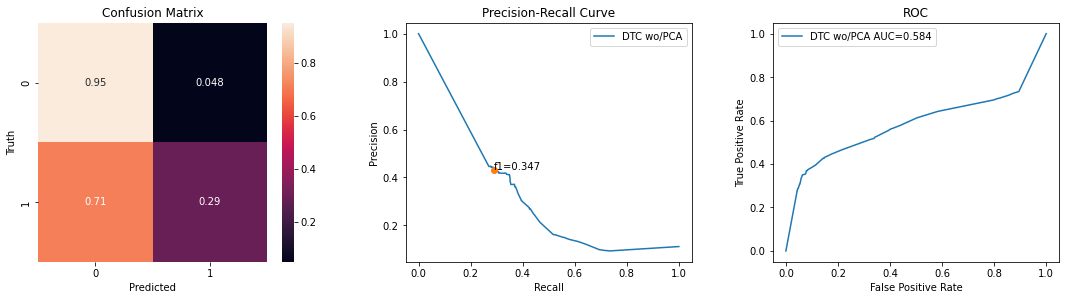

In [48]:
tree_fpr, tree_tpr, tree_auc, tree_precision, tree_recall = draw_plots( tree_grid, X_test, y_test, "DTC wo/PCA")

### Using SVM Classifier

In [49]:
svc_pipe = Pipeline([
    ("pca", PCA()),
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, tol=1.0e-3, max_iter=1000000, cache_size=1000000))
])

params = {
    "pca__n_components" : [ 19 ],
    "svc__kernel" : [ 'rbf' ],
    "svc__C" : [ 0.1, 1, 5, 10 ]
}

svc_grid = GridSearchCV(svc_pipe, param_grid=params, cv=5, scoring='f1', verbose=3).fit(X_train, y_train)

print(svc_grid.best_estimator_)
print(f'best param={svc_grid.best_params_}  best score={svc_grid.best_score_:.3f}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END pca__n_components=19, svc__C=0.1, svc__kernel=rbf;, score=0.015 total time=  55.2s
[CV 2/5] END pca__n_components=19, svc__C=0.1, svc__kernel=rbf;, score=0.033 total time=  55.2s
[CV 3/5] END pca__n_components=19, svc__C=0.1, svc__kernel=rbf;, score=0.064 total time=  58.2s
[CV 4/5] END pca__n_components=19, svc__C=0.1, svc__kernel=rbf;, score=0.012 total time= 1.0min
[CV 5/5] END pca__n_components=19, svc__C=0.1, svc__kernel=rbf;, score=0.015 total time=  58.0s
[CV 1/5] END pca__n_components=19, svc__C=1, svc__kernel=rbf;, score=0.044 total time= 1.2min
[CV 2/5] END pca__n_components=19, svc__C=1, svc__kernel=rbf;, score=0.095 total time= 1.2min
[CV 3/5] END pca__n_components=19, svc__C=1, svc__kernel=rbf;, score=0.095 total time= 1.2min
[CV 4/5] END pca__n_components=19, svc__C=1, svc__kernel=rbf;, score=0.030 total time= 1.2min
[CV 5/5] END pca__n_components=19, svc__C=1, svc__kernel=rbf;, score=0.030 total tim

In [50]:
results_5 = evaluate_scores( svc_grid, X_train, y_train, X_test, y_test, "SVC" )
evaluated_scores = evaluated_scores.append(results_5, ignore_index = True)
evaluated_scores

acc=0.890 prec=0.562 rec=0.089 f1=0.153 spec=0.991 fit_time=83.809


,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039
3,DecisionTree,0.729,0.878,0.431,0.291,0.347,0.952,0.584,0.321
4,SVC,0.281,0.890,0.562,0.089,0.153,0.991,0.694,83.809


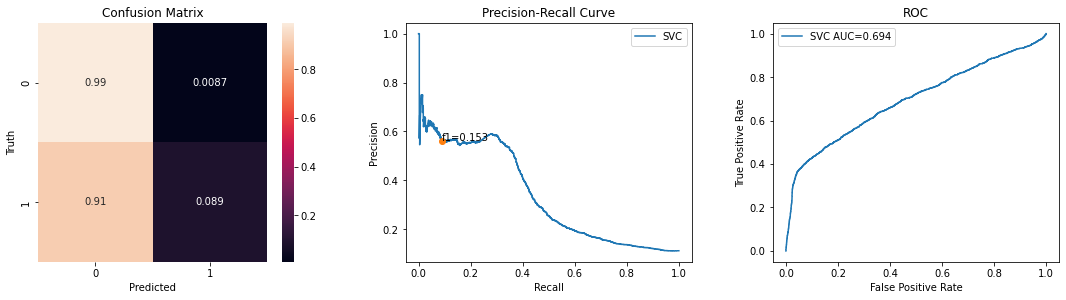

In [51]:
svc_fpr, svc_tpr, svc_auc, svc_precision, svc_recall = draw_plots( svc_grid, X_test, y_test, "SVC")

### Problem 9: Score the Model

What is the accuracy of your model?

In [52]:
# Display scores for all classifier models for comparison sorted by accuracy scores
evaluated_scores.sort_values(['accuracy'],ascending=False)

,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039
4,SVC,0.281,0.890,0.562,0.089,0.153,0.991,0.694,83.809
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN
3,DecisionTree,0.729,0.878,0.431,0.291,0.347,0.952,0.584,0.321


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [53]:
# Display scores for all classifier models for comparison sorted by f1 scores
evaluated_scores.sort_values(['f1'],ascending=False)

,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039
3,DecisionTree,0.729,0.878,0.431,0.291,0.347,0.952,0.584,0.321
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
4,SVC,0.281,0.890,0.562,0.089,0.153,0.991,0.694,83.809
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN


KNeighborsClassifier, DecisionTreeClassifier and LogisticRegression models had the best f1-scores, accuracy and recall-scores.  The following plots demostrate the same with respect to Precesion-Recall and ROC curves.

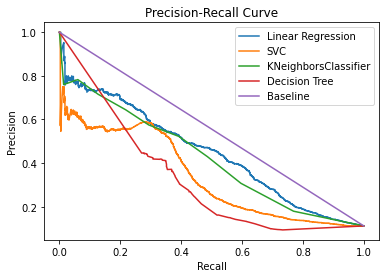

In [54]:
#Plot on models comparison based of Precision-Recall Curve
plt.plot( lgr_recall,  lgr_precision,  label="Linear Regression")
plt.plot( svc_recall,   svc_precision,   label="SVC")
plt.plot( knn_recall,   knn_precision,   label="KNeighborsClassifier")
plt.plot( tree_recall, tree_precision, label="Decision Tree")
plt.plot( dummy_recall,   dummy_precision,   label="Baseline")

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

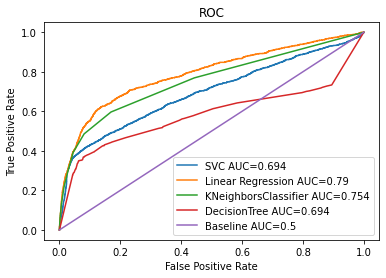

In [55]:
# Plot on models comparison based of ROC Curve
plt.plot( svc_fpr,   svc_tpr,   label="SVC AUC="+str(round(svc_auc,3)))
plt.plot( lgr_fpr,  lgr_tpr,  label="Linear Regression AUC="+str(round(lgr_auc,3)))
plt.plot( knn_fpr,   knn_tpr,   label="KNeighborsClassifier AUC="+str(round(knn_auc,3)))
plt.plot( tree_fpr, tree_tpr, label="DecisionTree AUC="+str(round(svc_auc,3)))
plt.plot( dummy_fpr,   dummy_tpr,   label="Baseline AUC="+str(round(dummy_auc,3)))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Using KNeighborsClassifier with additional hyperparameters and GridSearchCV

In [59]:
# Hyperparameters for KNN for improving the model and comparison
metrics = ['euclidean','manhattan'] 
pca__n_components = [ 19 ]
#algorithm = ['auto']
weights = ('uniform', 'distance')
neighbors = np.arange(1, 16)

param_grid  = dict(knn__algorithm = algorithm, knn__weights=weights, pca__n_components=pca__n_components, knn__metric=metrics, knn__n_neighbors=neighbors)
param_grid


{'knn__algorithm': ['auto'],
 'knn__weights': ('uniform', 'distance'),
 'pca__n_components': [19],
 'knn__metric': ['euclidean', 'manhattan'],
 'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}

In [60]:
# Split train/test dataset
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [61]:
knn_pipe_tune = Pipeline([
    ( "pca", PCA()),
    ( "scaler", StandardScaler()),
    ( "knn", KNeighborsClassifier())
])
#knn_pipe_tune.get_params().keys()
knn_grid_tune = GridSearchCV( knn_pipe_tune, param_grid=param_grid, cv=10, scoring='f1', verbose=0).fit(X_train_knn,y_train_knn)
print(knn_grid_tune.best_estimator_)
print(f'best param={knn_grid_tune.best_params_}  best score={knn_grid_tune.best_score_:.3f}')


Pipeline(steps=[('pca', PCA(n_components=19)), ('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=8,
                                      weights='distance'))])
best param={'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance', 'pca__n_components': 19}  best score=0.387


In [62]:
results_tune = evaluate_scores( knn_grid_tune, X_train, y_train, X_test, y_test, "KNeighborsClassifier-Tuned" )
evaluated_scores = evaluated_scores.append(results_tune, ignore_index = True)
evaluated_scores

acc=0.907 prec=0.653 rec=0.361 f1=0.465 spec=0.976 fit_time=0.021


,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039
3,DecisionTree,0.729,0.878,0.431,0.291,0.347,0.952,0.584,0.321
4,SVC,0.281,0.890,0.562,0.089,0.153,0.991,0.694,83.809
5,KNeighborsClassifier-Tuned,0.576,0.907,0.653,0.361,0.465,0.976,0.816,0.021


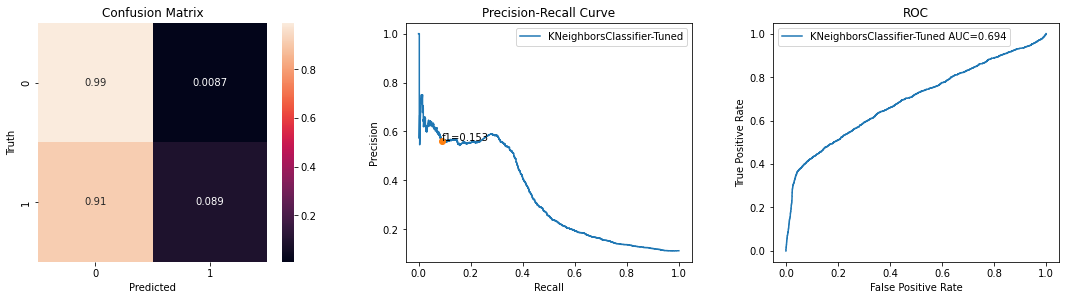

In [63]:
knn_2_fpr, knn_2_tpr, knn_2_auc, knn_2_precision, knn_2_recall = draw_plots( svc_grid, X_test, y_test, "KNeighborsClassifier-Tuned")


In [64]:
# Display scores for all classifier models for comparison sorted by f1 scores
evaluated_scores.sort_values(['f1'],ascending=False)

,classifier,train_score,accuracy,precision,recall,f1,specificity,auc,fit_time
5,KNeighborsClassifier-Tuned,0.576,0.907,0.653,0.361,0.465,0.976,0.816,0.021
2,KNeighborsClassifier,0.450,0.897,0.575,0.294,0.389,0.973,0.754,0.039
3,DecisionTree,0.729,0.878,0.431,0.291,0.347,0.952,0.584,0.321
1,LogisticRegression,0.320,0.901,0.671,0.232,0.344,0.986,0.790,0.048
4,SVC,0.281,0.890,0.562,0.089,0.153,0.991,0.694,83.809
0,Baseline,0.886,0.888,0.000,0.000,0.000,1.000,0.500,NaN


### Findings and Scope for Imprevements


PCA reduced the number of features needed to train classifiers mainly reducing the number of non-important features.  In this assignment PCA uses different compoenents including all 19 principal compoenents for comparison of performance of the features in the model evaluation.  There is a scope to imporove or try with more or different princiapal components for predictions and evaluate specific features for model improvement.

All models used standard process/steps and same dataset/split train and test datasets for better model comparison.  All models used baseline GridSearchCV with mimimum hyperparameters for fitting training data and performed predictions, scores and comparisons.

KNeighborsClassifier and Decision Tree Classifier with GridSearchCV with minimal hyperparameters as baseline performed best with respect to accuracy, recall and f1 scores when compared to other classifiers in this assignment.  

Performed fine tuning on top KNeighborsClassifier further using additional hyperparameters and the outcome has good scores with respect to 90.7% accuracy and 46.5% f1 scores.  This fine tuned model run peformed much better than all other models and stood on top in the table.  Please refer to the evidence in the table above.

There is a scope to perform model tuning with different combinations KNeighborsClassifier hyperparameters like algorithms, p and metric values for better predictions and scores.
